<a href="https://colab.research.google.com/github/Diveshrao1708/Metal-Scrap-Classifier/blob/main/MM206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/data'

In [ ]:
os.listdir(data_dir)

['.ipynb_checkpoints',
 'Stainless Steel Scrap',
 'Aluminium Scrap',
 'Steel Scrap',
 'Copper Scrap']

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

Image not in ext list /content/data/Stainless Steel Scrap/stainless-steel-scrap-1597224122-5551611.jpeg
Image not in ext list /content/data/Stainless Steel Scrap/202-stainless-steel-turning-scrap.jpg
Image not in ext list /content/data/Stainless Steel Scrap/316-scrap.jpg
Image not in ext list /content/data/Stainless Steel Scrap/430-stainless-steel-scrap.jpg
Image not in ext list /content/data/Stainless Steel Scrap/and-aluminum-scrap-for-recycling-at-the-scrap-yard-plant-and-hose-2300760599.jpg
Image not in ext list /content/data/Aluminium Scrap/shredded-aluminium-scrap-1610962607-5693457.jpeg
Image not in ext list /content/data/Aluminium Scrap/recycling-industry-business-recyclingwaste-separation-600nw-577760548.jpg
Image not in ext list /content/data/Aluminium Scrap/aluminium-scrap-.jpeg
Image not in ext list /content/data/Aluminium Scrap/scrap-yard-old-iron-sheet-600nw-2235204355.jpg
Image not in ext list /content/data/Aluminium Scrap/Aluminium-Wire-Scrap-99.99-04.jpg
Image not in ex

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/data')

Found 823 files belonging to 4 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

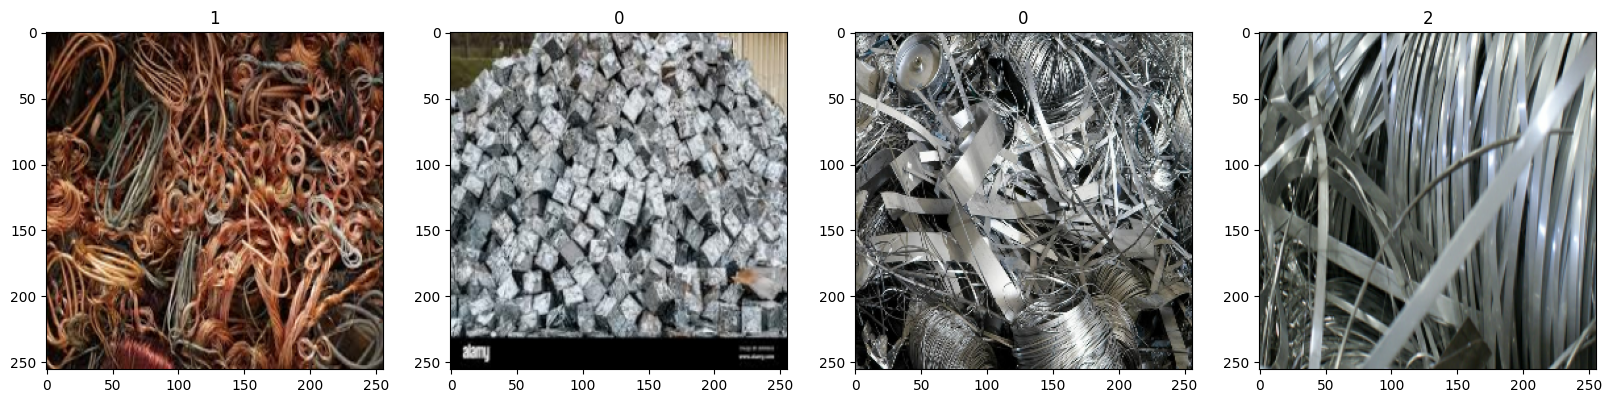

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[8.70588243e-01, 6.39215708e-01, 4.82352942e-01],
          [8.96262228e-01, 6.64889693e-01, 5.08026958e-01],
          [9.18367028e-01, 6.84260130e-01, 5.35600483e-01],
          ...,
          [9.78017747e-01, 9.92516875e-01, 8.67853880e-01],
          [9.64713514e-01, 9.72916663e-01, 8.69163632e-01],
          [9.29411769e-01, 9.21568632e-01, 8.62745106e-01]],
 
         [[8.83425236e-01, 6.52052701e-01, 4.95189965e-01],
          [8.93341303e-01, 6.61968768e-01, 5.05106032e-01],
          [9.00759995e-01, 6.68890774e-01, 5.13518095e-01],
          ...,
          [9.49222207e-01, 9.57302809e-01, 8.21745932e-01],
          [9.69953656e-01, 9.71738279e-01, 8.59817922e-01],
          [9.87178326e-01, 9.72916663e-01, 8.98046851e-01]],
 
         [[9.32758868e-01, 7.01386333e-01, 5.39054811e-01],
          [9.07849610e-01, 6.76477075e-01, 5.14145553e-01],
          [8.80269527e-01, 6.48896992e-01, 4.86565500e-01],
          ...,
          [8.22694600e-01, 8.13772082e-01, 6.7057

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

18

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))  # num_classes is the number of classes in your dataset


In [ ]:
model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
18/18 [==============================] - 51s 3s/step - loss: 0.1172 - accuracy: 0.9566 - val_loss: 0.1807 - val_accuracy: 0.9500
Epoch 2/20
18/18 [==============================] - 43s 2s/step - loss: 0.1271 - accuracy: 0.9566 - val_loss: 0.1533 - val_accuracy: 0.9500
Epoch 3/20
18/18 [==============================] - 44s 2s/step - loss: 0.1025 - accuracy: 0.9635 - val_loss: 0.1843 - val_accuracy: 0.9500
Epoch 4/20
18/18 [==============================] - 46s 2s/step - loss: 0.1404 - accuracy: 0.9479 - val_loss: 0.1761 - val_accuracy: 0.9312
Epoch 5/20
18/18 [==============================] - 44s 2s/step - loss: 0.0910 - accuracy: 0.9618 - val_loss: 0.1445 - val_accuracy: 0.9438
Epoch 6/20
18/18 [==============================] - 43s 2s/step - loss: 0.1047 - accuracy: 0.9497 - val_loss: 0.0785 - val_accuracy: 0.9812
Epoch 7/20
18/18 [==============================] - 43s 2s/step - loss: 0.1026 - accuracy: 0.9514 - val_loss: 0.0984 - val_accuracy: 0.9563
Epoch 8/20
18/18 [==

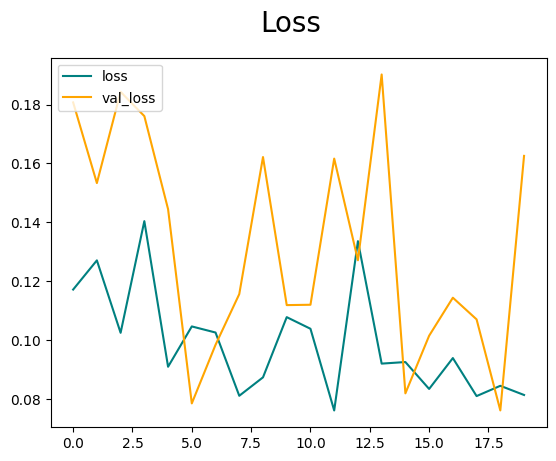

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

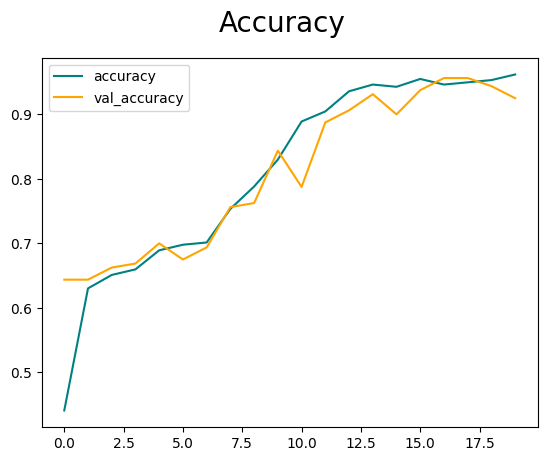

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

In [ ]:
len(test)

2

In [ ]:
import cv2

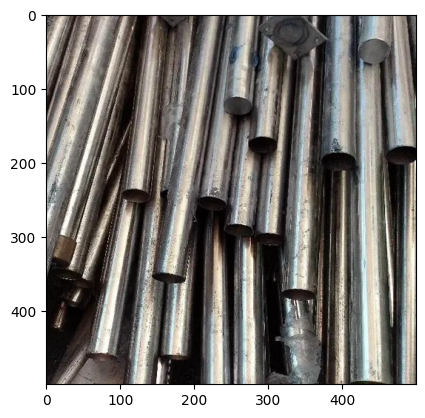

In [ ]:
img = cv2.imread('/content/4-mm-thick-98-purity-rust-proof-stainless-steel-scrap-pipe-264.jpg')
plt.imshow(img)
plt.show()

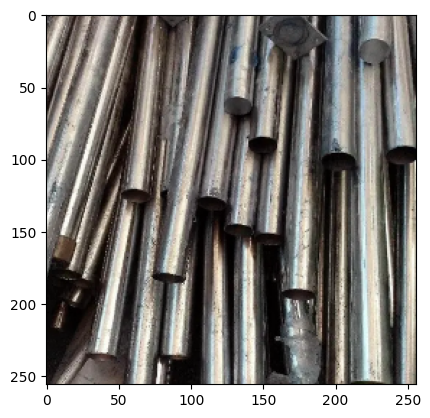

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [ ]:
yhat

array([[1.1401253e-05, 1.6427809e-11, 9.9845338e-01, 1.5351628e-03]],
      dtype=float32)

In [ ]:
import numpy as np
idx = np.argmax(yhat)
print(idx)

2


In [ ]:
if idx==0:
  print("Silver")
  print("Aluminium Scrap")
elif idx==1:
  print("Brown")
  print("Copper Scrap")
elif idx==2:
  print("Grey Silver")
  print("Stainless Steel Scrap")
elif idx==3:
  print("Brown")
  print("Steel Scrap")

Grey Silver
Stainless Steel Scrap
